In [3]:
# need to install preliminaries to begin the EDA

In [69]:
import nasdaqdatalink
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


nasdaqdatalink.ApiConfig.api_key = 'kTvd1Tz3SnoVATjTxNX1'
df_zillow_indicators = nasdaqdatalink.get_table('ZILLOW/INDICATORS', paginate=True)
df_zillow_regions = nasdaqdatalink.get_table('ZILLOW/REGIONS', paginate=True)

In [70]:
# print out the column names for the df_zillow_regions dataframe
print(df_zillow_regions.columns)


Index(['region_id', 'region_type', 'region'], dtype='object')


# Redfin DATA EDA

In [7]:
# import the redfin data from the tsv file titled Redfin_weekly.tsv000
df_redfin = pd.read_csv('Redfin_weekly.tsv000', sep='\t')


In [8]:
# print out the column names for the df_redfin dataframe
print(df_redfin.columns)

# print out the first 5 rows of the df_redfin dataframe
print(df_redfin.head())

# count the number of rows in the df_redfin dataframe
print(df_redfin.shape)

Index(['region_id', 'region_type_id', 'region_name', 'region_type',
       'period_begin', 'period_end', 'duration', 'total_homes_sold',
       'total_homes_sold_yoy', 'average_homes_sold',
       ...
       'average_adjustment_average_homes_sold', 'adjusted_average_homes_sold',
       'average_adjustment_average_new_listings',
       'adjusted_average_new_listings', 'average_adjustment_pending_sales',
       'adjusted_pending_sales', 'adjusted_average_homes_delisted_yoy',
       'adjusted_average_homes_sold_yoy', 'adjusted_average_new_listings_yoy',
       'adjusted_pending_sales_yoy'],
      dtype='object', length=102)
   region_id  region_type_id                   region_name region_type  \
0      31580              -2   Madisonville, KY metro area       metro   
1      33060              -2          Miami, OK metro area       metro   
2      35300              -2      New Haven, CT metro area       metro   
3      41884              -2  San Francisco, CA metro area       metro   
4

In [17]:
print(df_redfin.columns.tolist())


['region_id', 'region_type_id', 'region_name', 'region_type', 'period_begin', 'period_end', 'duration', 'total_homes_sold', 'total_homes_sold_yoy', 'average_homes_sold', 'average_homes_sold_yoy', 'total_homes_sold_with_price_drops', 'total_homes_sold_with_price_drops_yoy', 'average_homes_sold_with_price_drops', 'average_homes_sold_with_price_drops_yoy', 'percent_homes_sold_with_price_drops', 'percent_homes_sold_with_price_drops_yoy', 'median_sale_price', 'median_sale_price_yoy', 'median_sale_ppsf', 'median_sale_ppsf_yoy', 'median_days_to_close', 'median_days_to_close_yoy', 'price_drops', 'price_drops_yoy', 'percent_active_listings_with_price_drops', 'percent_active_listings_with_price_drops_yoy', 'pending_sales', 'pending_sales_yoy', 'median_pending_sqft', 'median_pending_sqft_yoy', 'off_market_in_two_weeks', 'off_market_in_two_weeks_yoy', 'off_market_in_one_week', 'off_market_in_one_week_yoy', 'percent_off_market_in_two_weeks', 'percent_off_market_in_two_weeks_yoy', 'percent_off_marke

In [57]:
# create a dataframe the contains the columns of interest listed in the list columns_for_EDA_subset

columns_for_EDA_subset = ['region_id','region_type_id', 'region_name', 'region_type', 'period_begin', 'period_end', 'duration', 'total_homes_sold', 'median_sale_price','median_sale_ppsf','median_days_to_close']
df_redfin_subset = df_redfin[columns_for_EDA_subset]
# calculate how many rows are in the df_redfin_subset dataframe
print(df_redfin_subset.shape)

# print the strings in the region_type column
print(df_redfin_subset['region_type'].unique())

(3435497, 11)
['metro' 'county']


In [67]:
# splitting the dataset into two dataframes based on the region_type column
df_redfin_county = df_redfin_subset[df_redfin_subset['region_type'] == 'county']
df_redfin_metro = df_redfin_subset[df_redfin_subset['region_type'] == 'metro']

# print the number of values of df_redfin_county
print(df_redfin_metro.shape)

# using a printf statement, print the number of rows in the df_redfin_county and the df_redfin_metro dataframes 
print('The number of rows in the df_redfin_county dataframe is: %d' % df_redfin_county.shape[0])
print('The number of rows in the df_redfin_metro dataframe is: %d' % df_redfin_metro.shape[0])

# divide the number of rows of the df_redfin_county dataframe by the number of rows of the df_redfin_metro dataframe
print('The number of rows in the df_redfin_county dataframe divided by the number of rows in the df_redfin_metro dataframe is: %d' % (df_redfin_county.shape[0]/df_redfin_metro.shape[0]))


(835601, 11)
The number of rows in the df_redfin_county dataframe is: 2599896
The number of rows in the df_redfin_metro dataframe is: 835601
The number of rows in the df_redfin_county dataframe divided by the number of rows in the df_redfin_metro dataframe is: 3
2506803


['region_id', 'region_type_id', 'region_name', 'region_type', 'period_begin', 'period_end', 'duration', 'total_homes_sold', 'median_sale_price', 'median_sale_ppsf', 'median_days_to_close']


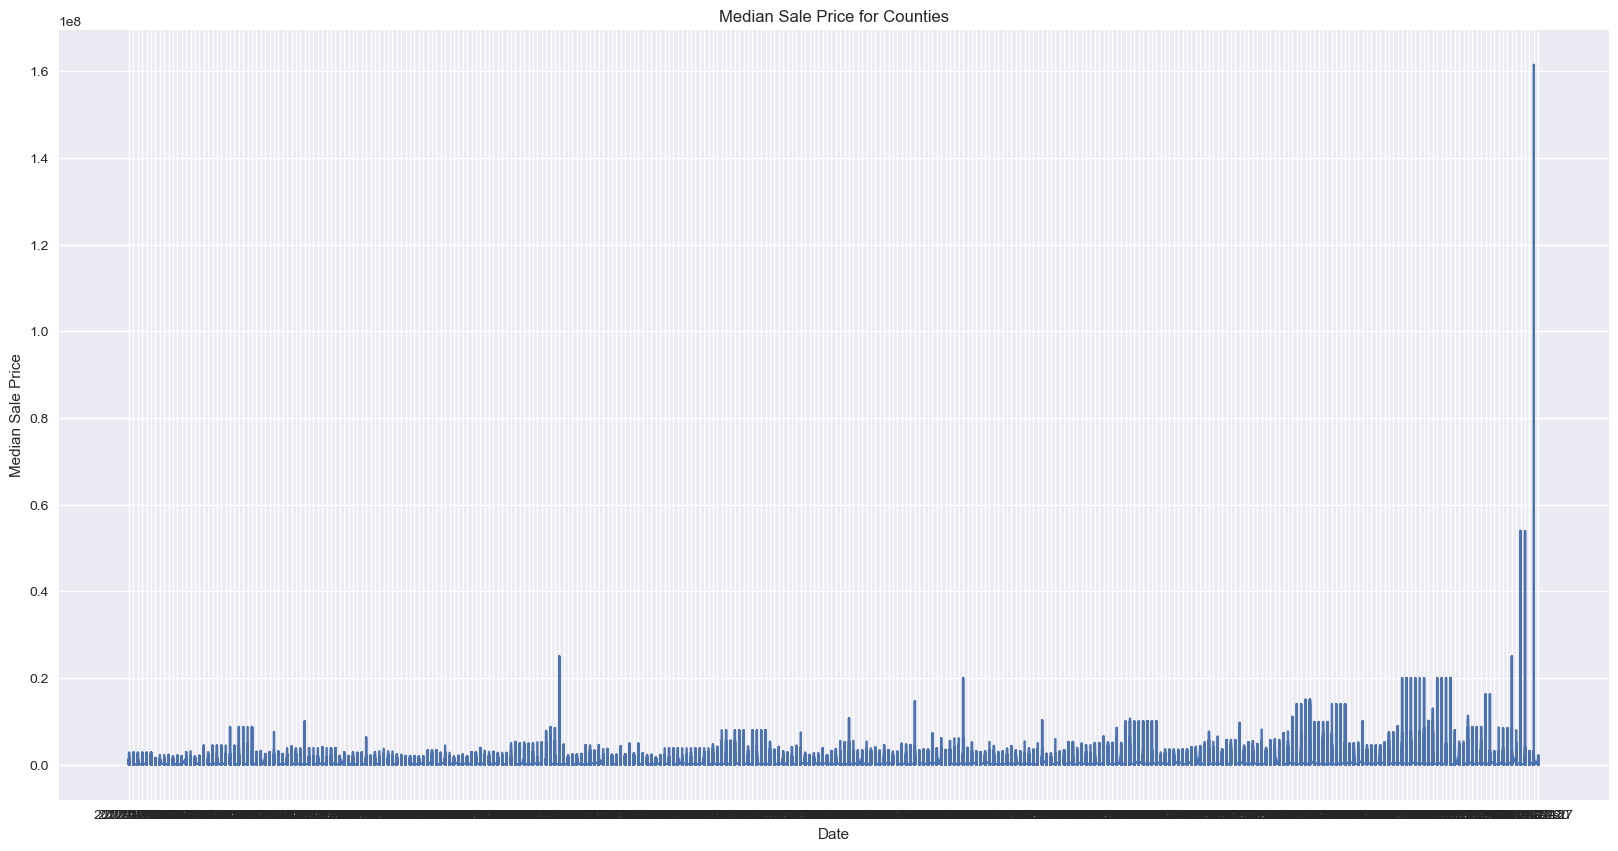

In [73]:
print(df_redfin_county.columns.tolist())

#graphing the median sale price for the df_redfin_county dataframe
plt.figure(figsize=(20,10))
plt.plot(df_redfin_county['period_begin'], df_redfin_county['median_sale_price'])
plt.xlabel('Date')
plt.ylabel('Median Sale Price')
plt.title('Median Sale Price for Counties')
plt.show()


In [87]:
# get the datatypes for each column in the df_redfin_county dataframe
print(df_redfin_county.dtypes)
#convert preiod_begin column to datetime
df_redfin_county['period_begin'] = pd.to_datetime(df_redfin_county['period_begin'])
# convert period_end column to datetime
df_redfin_county['period_end'] = pd.to_datetime(df_redfin_county['period_end'])

df_redfin_metro['period_begin'] = pd.to_datetime(df_redfin_metro['period_begin'])
# convert period_end column to datetime
df_redfin_metro['period_end'] = pd.to_datetime(df_redfin_metro['period_end'])

region_id                        int64
region_type_id                   int64
region_name                     object
region_type                     object
period_begin            datetime64[ns]
period_end              datetime64[ns]
duration                        object
total_homes_sold               float64
median_sale_price              float64
median_sale_ppsf               float64
median_days_to_close           float64
year                             int64
dtype: object


/var/folders/q3/wzby546s55gf5yfzvbtqc37c0000gn/T/ipykernel_43308/3350014640.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_redfin_county['period_begin'] = pd.to_datetime(df_redfin_county['period_begin'])
/var/folders/q3/wzby546s55gf5yfzvbtqc37c0000gn/T/ipykernel_43308/3350014640.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_redfin_county['period_end'] = pd.to_datetime(df_redfin_county['period_end'])
/var/folders/q3/wzby546s55gf5yfzvbtqc37c0000gn/T/ipykernel_43308/3350014640.py:8: SettingWit

/var/folders/q3/wzby546s55gf5yfzvbtqc37c0000gn/T/ipykernel_43308/838669077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_redfin_county['year'] = df_redfin_county['period_begin'].dt.year


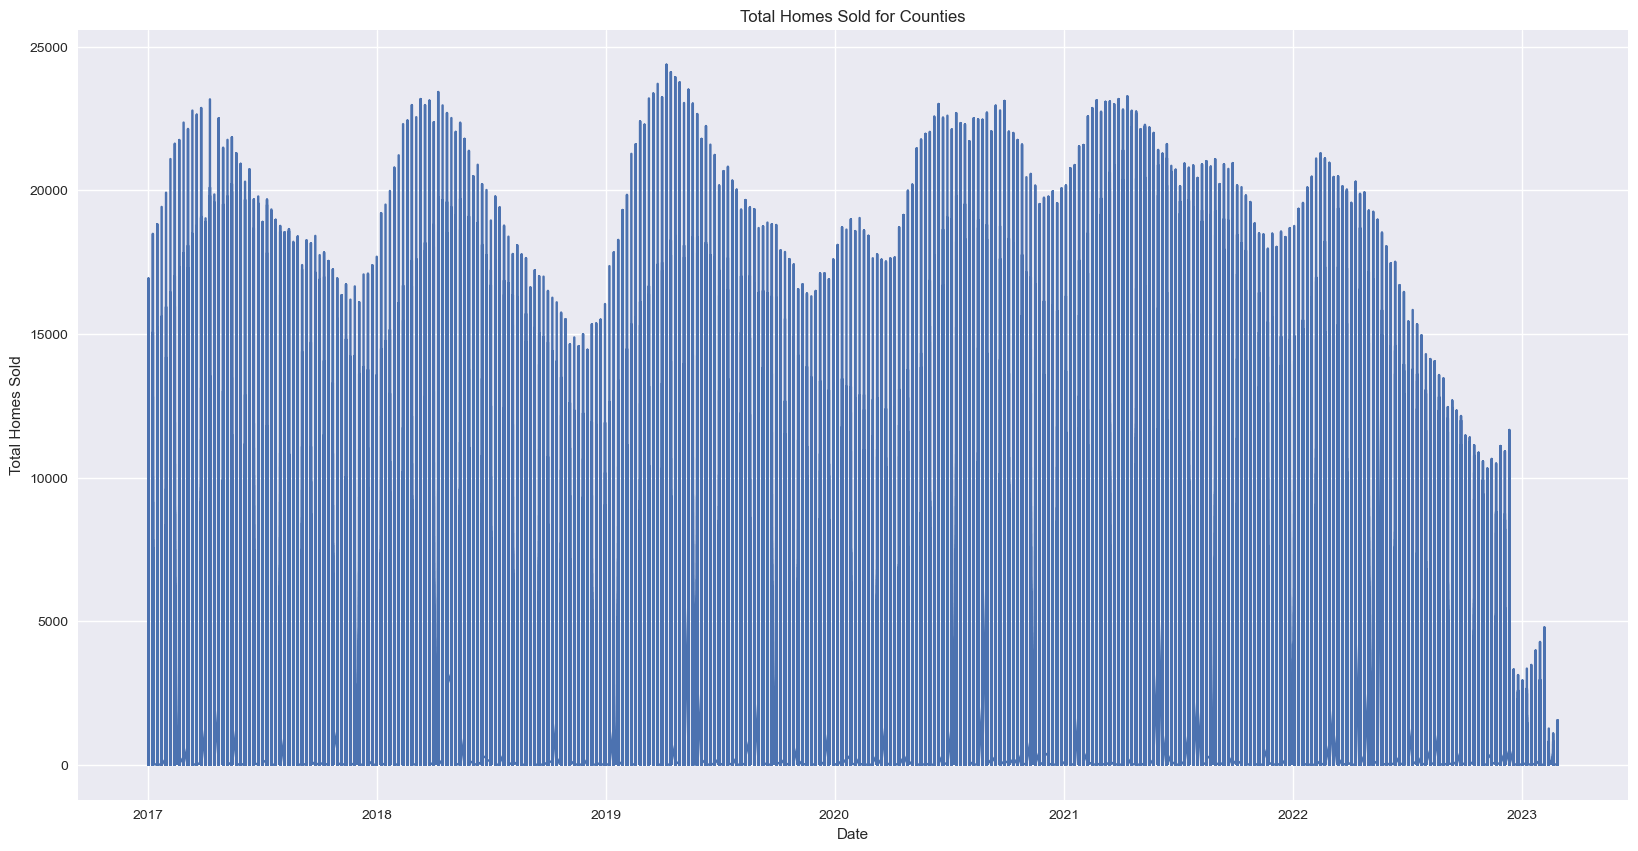

In [79]:

#create a new column in the df_redfin_county dataframe that contains the year of the period_begin column
df_redfin_county['year'] = df_redfin_county['period_begin'].dt.year
# replicate the graph in the cell above
plt.figure(figsize=(20,10))
plt.plot(df_redfin_county['period_begin'], df_redfin_county['total_homes_sold'])
plt.xlabel('Date')
plt.ylabel('Total Homes Sold')
plt.title('Total Homes Sold for Counties')
plt.show()

In [86]:
# count the number of rows in the df_redfin_metor dataframe
print(df_redfin_metro.shape)
print(df_redfin_metro.columns.tolist())

(835601, 12)
['region_id', 'region_type_id', 'region_name', 'region_type', 'period_begin', 'period_end', 'duration', 'total_homes_sold', 'median_sale_price', 'median_sale_ppsf', 'median_days_to_close', 'year']


/var/folders/q3/wzby546s55gf5yfzvbtqc37c0000gn/T/ipykernel_43308/1794759507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_redfin_metro['year'] = df_redfin_metro['period_begin'].dt.year


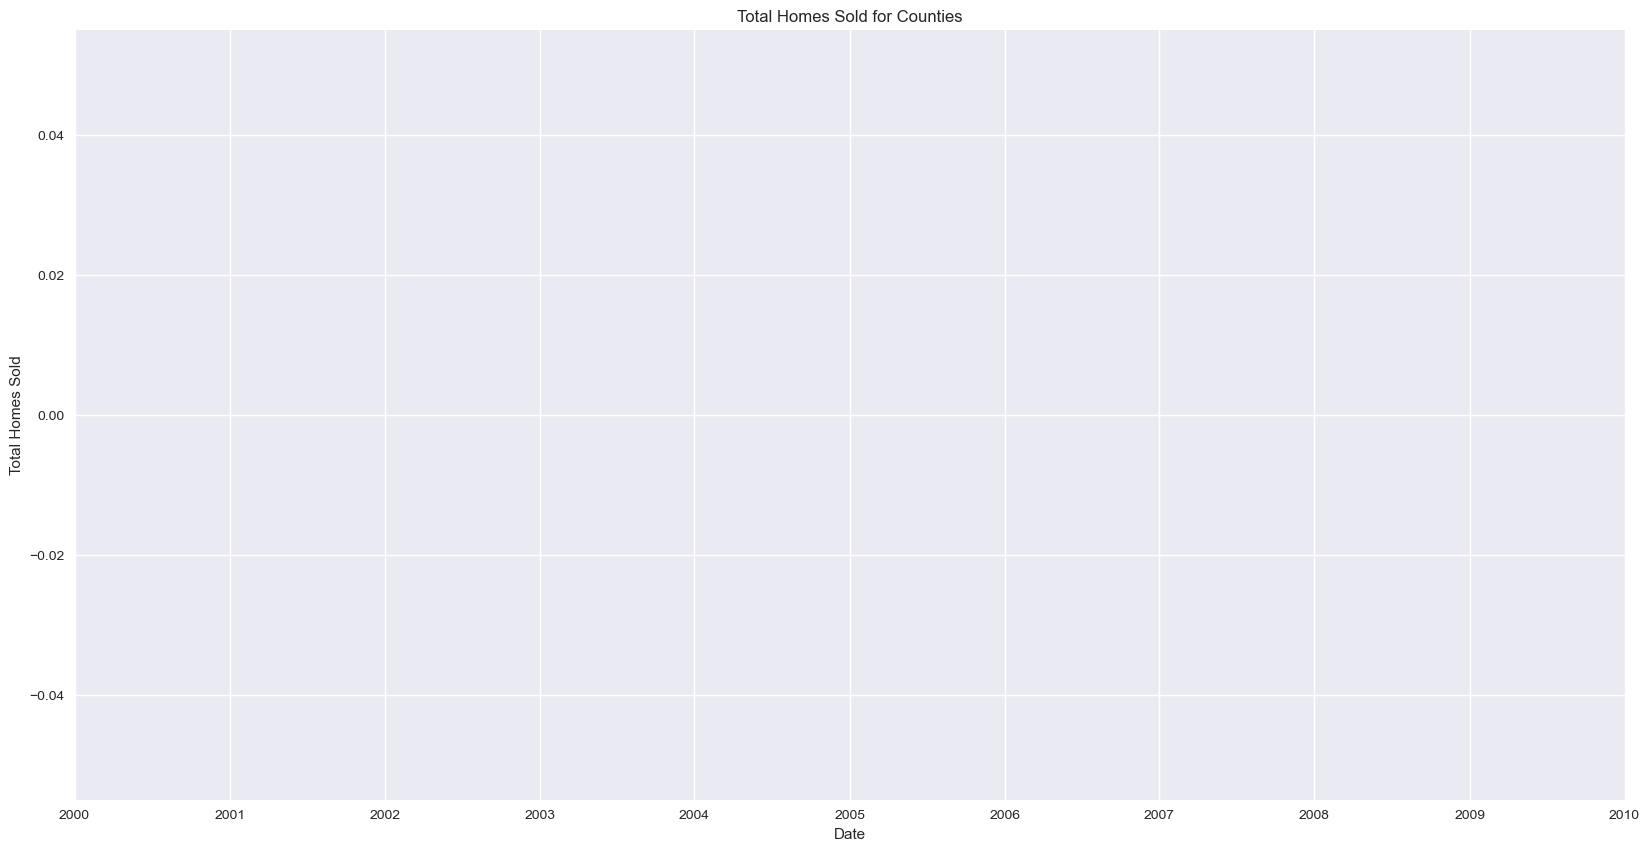

In [88]:
df_redfin_metro['year'] = df_redfin_metro['period_begin'].dt.year
# replicate the graph in the cell above
plt.figure(figsize=(20,10))
plt.plot(df_redfin_metro['period_begin'], df_redfin_metro['total_homes_sold'])
plt.xlabel('Date')
plt.ylabel('Total Homes Sold')
plt.title('Total Homes Sold for Counties')
plt.show()

In [45]:
# graph the median sale price over time by metro area in the df_redfin dataframe

#create a subset of the df_redfin dataframe of region_name, period_begin, and median_sale_price, duration = 4 weeks
# df_redfin_subset = df_redfin[['region_name', 'period_begin', 'median_sale_price', 'duration']]
#group the df_redfin_subset dataframe by region_name and period_begin, then calculate the mean of the median_sale_price
df_redfin_subset = df_redfin_subset.groupby(['region_name', 'period_begin'])
# only take the rows where the duration = 4 weeks
df_redfin_subset_2 = df_redfin_subset.filter(lambda x: x['duration'].iloc[0] == '4 weeks')

df_redfin_subset_2 = df_redfin_subset_2.groupby(['region_name', 'period_begin']).mean()
print(df_redfin_subset_2.head())



                                   region_id  region_type_id  \
region_name          period_begin                              
Abbeville County, SC 2017-01-16       2433.0             5.0   
                     2017-01-23       2433.0             5.0   
                     2017-01-30       2433.0             5.0   
                     2017-02-06       2433.0             5.0   
                     2017-02-13       2433.0             5.0   

                                   total_homes_sold  median_sale_price  \
region_name          period_begin                                        
Abbeville County, SC 2017-01-16            4.333333      130486.100000   
                     2017-01-23            5.500000      230312.500000   
                     2017-01-30            4.333333      204597.200000   
                     2017-02-06            5.666667      277770.833333   
                     2017-02-13            7.000000      141607.100000   

                                

In [71]:
#print the unique region_names in the df_redfin_subset_2 dataframe
print(df_redfin_subset_2.index.get_level_values('region_name').unique())
# df_redfin_subset_2.loc['Atlanta, GA'].plot(figsize=(20,10), title='Median Sale Price by Metro Area', legend=True, fontsize=12)
# plt.show()

print(df_redfin_)
# df_redfin_subset_2.loc['Abbeville County, SC'].plot(figsize=(20,10), title='Median Sale Price by Metro Area', legend=True, fontsize=12)
# plt.show()

Index(['Abbeville County, SC', 'Aberdeen, SD metro area',
       'Aberdeen, WA metro area', 'Abilene, TX metro area',
       'Acadia Parish, LA', 'Accomack County, VA', 'Ada County, ID',
       'Ada, OK metro area', 'Adair County, IA', 'Adair County, KY',
       ...
       'Youngstown, OH metro area', 'Yuba City, CA metro area',
       'Yuba County, CA', 'Yuma County, AZ', 'Yuma County, CO',
       'Yuma, AZ metro area', 'Zanesville, OH metro area', 'Zapata County, TX',
       'Zapata, TX metro area', 'Zavala County, TX'],
      dtype='object', name='region_name', length=3825)


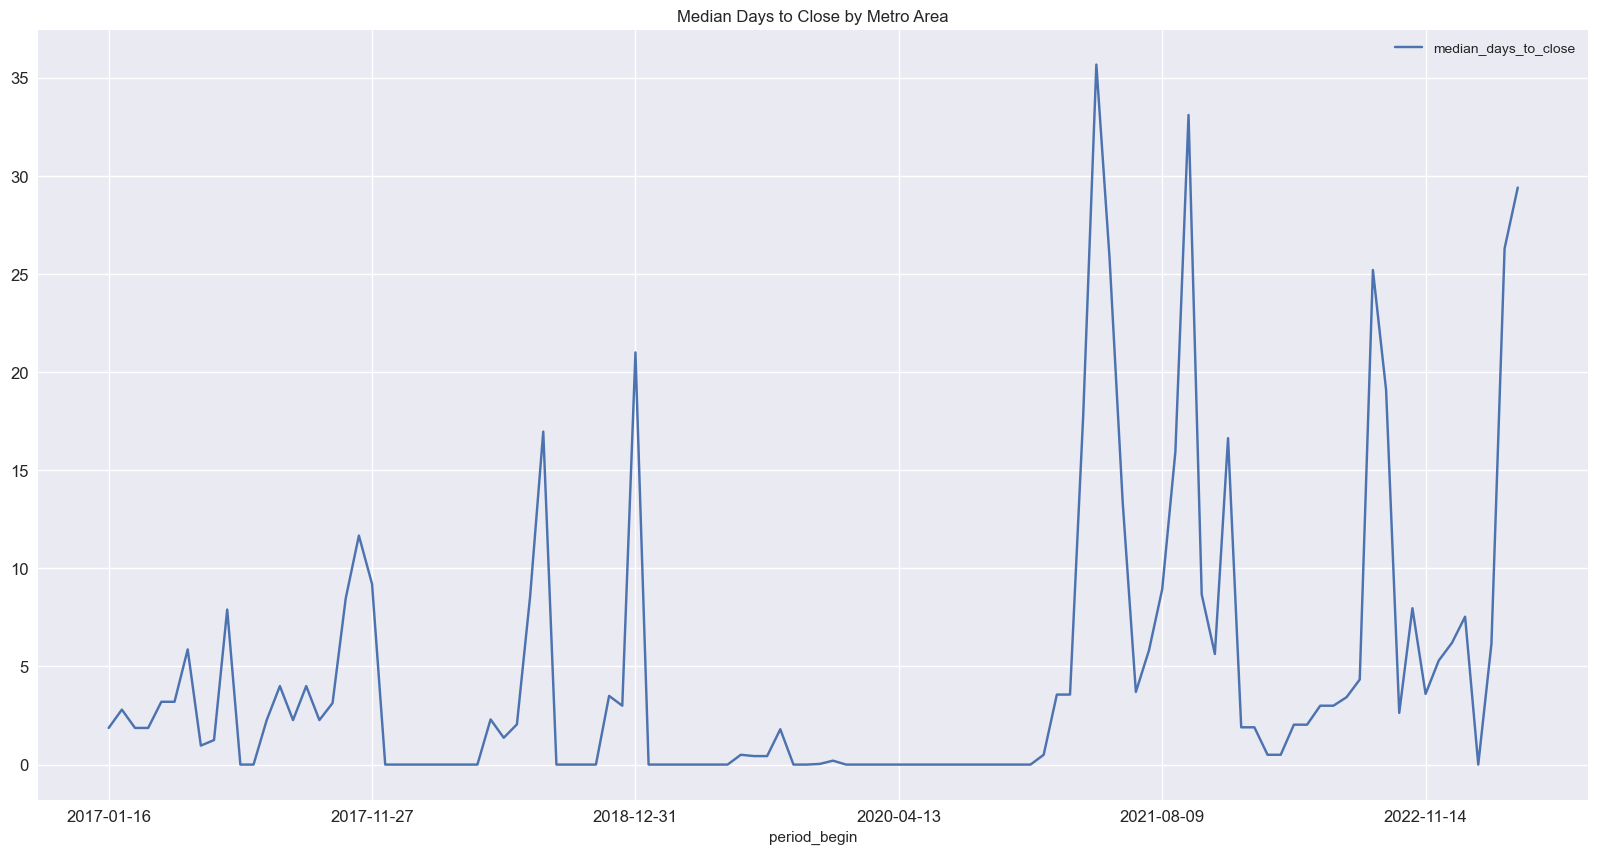

In [54]:
#graph the only the median_days_to_close valyes against period_begin df_redfin_subset_2 dataframe for Abbeville County, SC
df_redfin_subset_2.loc['Abbeville County, SC', 'median_days_to_close'].plot(figsize=(20,10), title='Median Days to Close by Metro Area', legend=True, fontsize=12)
plt.show()



# df_redfin_subset_2.loc['Abbeville County, SC'].plot(figsize=(20,10), title='Median Sale Price by Metro Area', legend=True, fontsize=12)
# df_redfin_subset_2.loc['Yuba County, CA'].plot(figsize=(20,10), title='Median Sale Price by Metro Area', legend=True, fontsize=12)

# df_redfin_subset_2.loc['Abbeville County, SC'].plot(figsize=(20,10), title='Median Sale Price by Metro Area SC', legend=True, fontsize=12)
# df_redfin_subset_2.loc['Yuba County, CA'].plot(figsize=(20,10), title='Median Sale Price by Metro Area', legend=True, fontsize=12)
# plt.show()

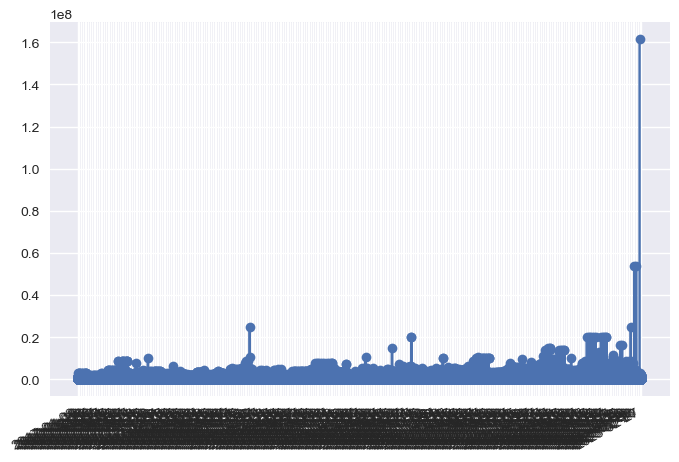

In [24]:
plt.style.use('seaborn')
df_redfin.sort_values(['period_begin'], inplace = True)
plt.plot_date(df_redfin['period_begin'], df_redfin['median_sale_price'], linestyle='solid')
plt.gcf().autofmt_xdate()
